Rodrigo Toscano Ney

Relatório 1 - PESC - 19/07/2017


### Objetivo :
#### O objetivo deste projeto é analisar a distribuição da base de dados de tumores sólidos pediátricos.

In [4]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Pré processamento dos dados de Tumores

#### São carregados dados dos marcadores:

In [5]:
tumors = pd.read_csv('train/tumores_20_06_2017_no_comma.csv', encoding='latin1')
tumors.sample(10)

,CASE NUMBER,sample,DISEASE,GROUP,Hematopoietico,Events:A,Visibility %:A,BV421:A,CD10:A,CD105:A,...,FSC-A:T,FSC-H:T,GD2:T,HLADR:T,MPO:T,nuMIOGENIN:T,nuMYOD:T,OCT3/4:T,SSC-A:T,SSC-H:T
137,30,mass,wilms tumor,wilms tumor,nao,203680.0,86.55,NaN,201.19,NaN,...,60580.80,50378.0,NaN,NaN,NaN,NaN,NaN,NaN,7380.50,NaN
148,1702,mass,renal carcinoma,renal carcinoma,nao,61011.0,76.57,8057.21,158.62,64.1,...,40650.75,32704.5,NaN,NaN,NaN,NaN,NaN,NaN,13425.55,8711.5
127,1325,BM,rhabdomyosarcoma,rhabdomyosarcoma,nao,68271.0,6.58,NaN,602.47,NaN,...,53279.59,45906.0,NaN,NaN,NaN,NaN,NaN,NaN,12499.20,9397.5
15,57,lymph node,B lymphoblastic leukemia,B lymphoblastic leukemia,sim,467519.0,79.63,NaN,47.63,NaN,...,84518.09,84737.0,NaN,NaN,85.64,NaN,NaN,NaN,7380.00,NaN
18,453,BM,B lymphoblastic leukemia,B lymphoblastic leukemia,sim,0.0,NaN,NaN,NaN,NaN,...,68013.86,58035.5,NaN,NaN,131.13,NaN,NaN,NaN,10513.95,NaN
64,2,BM,neuroblastoma,disease free,livre de doenca,0.0,NaN,NaN,NaN,NaN,...,56822.85,NaN,NaN,NaN,139.94,NaN,NaN,NaN,10857.99,NaN
59,1075,PB,hemangioma,disease free,livre de doenca,0.0,NaN,NaN,NaN,NaN,...,78408.34,65628.0,NaN,NaN,86.87,NaN,NaN,NaN,16273.35,NaN
129,1686,pericardial effusion,rhabdomyosarcoma,disease free,livre de doenca,0.0,NaN,NaN,NaN,NaN,...,102978.90,90853.5,NaN,NaN,105.74,NaN,NaN,NaN,10458.12,7752.0
26,516,mass,Burkitt Lymphoma,Burkitt Lymphoma,sim,281758.0,52.74,NaN,675.24,NaN,...,82126.14,69886.5,NaN,NaN,106.20,NaN,NaN,NaN,9463.43,NaN
114,1964,BM,neuroblastoma,Neuroblastic tumor,nao,26151.0,0.88,491.91,NaN,NaN,...,82067.40,72516.0,66.73,NaN,NaN,148.03,NaN,NaN,9820.80,7856.0


#### Pegamos do data frame apenas dados de tumores não hematopoieticos, inicialmente

In [6]:
no_hematopoietic_tumors = tumors[tumors.Hematopoietico == 'nao']
del no_hematopoietic_tumors['CASE NUMBER']
no_hematopoietic_tumors.sample(10)

,sample,DISEASE,GROUP,Hematopoietico,Events:A,Visibility %:A,BV421:A,CD10:A,CD105:A,CD117:A,...,FSC-A:T,FSC-H:T,GD2:T,HLADR:T,MPO:T,nuMIOGENIN:T,nuMYOD:T,OCT3/4:T,SSC-A:T,SSC-H:T
50,mass,germ cell tumor,germ cell tumor,nao,51291.0,33.38,1289.59,355.01,533.36,NaN,...,90673.31,75042.0,249.17,NaN,NaN,72.33,NaN,NaN,7741.44,NaN
46,mass,ganglioneuroma,Neuroblastic tumor,nao,1019117.0,85.66,NaN,175.11,NaN,2876.94,...,106444.52,91522.0,NaN,NaN,120.07,NaN,NaN,NaN,7927.20,7694.0
148,mass,renal carcinoma,renal carcinoma,nao,61011.0,76.57,8057.21,158.62,64.10,3747.63,...,40650.75,32704.5,NaN,NaN,NaN,NaN,NaN,NaN,13425.55,8711.5
116,PB,neuroblastoma,Neuroblastic tumor,nao,1215.0,0.09,588.88,NaN,NaN,NaN,...,81404.10,71763.0,78.36,NaN,NaN,191.90,NaN,NaN,9588.96,7660.0
49,mass,germ cell tumor,germ cell tumor,nao,10725.0,100.00,NaN,23.30,NaN,67.15,...,107248.97,91133.5,NaN,NaN,NaN,NaN,NaN,NaN,16175.52,NaN
104,mass,neuroblastoma,Neuroblastic tumor,nao,3086.0,21.81,NaN,93.64,NaN,71.70,...,101426.40,88832.0,NaN,NaN,154.09,NaN,NaN,NaN,6753.89,NaN
89,mass,neuroblastoma,Neuroblastic tumor,nao,100.0,8.49,869.54,385.20,2254.58,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,mass,neuroblastoma,Neuroblastic tumor,nao,330059.0,25.97,NaN,NaN,NaN,NaN,...,91759.85,79517.0,119.59,111.52,203.80,NaN,NaN,NaN,7066.08,NaN
55,ascitic fluid,germ cell tumor,germ cell tumor,nao,194214.0,58.01,661.55,NaN,NaN,NaN,...,83919.29,71168.0,50.79,NaN,NaN,62.30,NaN,NaN,5901.12,NaN
63,mass(pos-qt),neuroblastoma,Neuroblastic tumor,nao,59.0,6.08,NaN,-849.26,NaN,343.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
no_hematopoietic_tumors.describe()

,Events:A,Visibility %:A,BV421:A,CD10:A,CD105:A,CD117:A,CD123:A,CD14:A,CD15:A,CD16:A,...,FSC-A:T,FSC-H:T,GD2:T,HLADR:T,MPO:T,nuMIOGENIN:T,nuMYOD:T,OCT3/4:T,SSC-A:T,SSC-H:T
count,7.900000e+01,79.000000,20.000000,56.000000,12.000000,43.000000,20.000000,23.000000,4.000000,19.000000,...,67.000000,51.000000,27.000000,14.000000,25.000000,14.000000,1.00,0.0,65.000000,18.000000
mean,1.317935e+05,45.995570,7008.040000,1074.790536,1220.787500,367.994186,2679.300000,820.174348,6141.592500,712.970526,...,83756.114179,74307.735294,273.694074,429.749286,757.073200,144.993571,206.16,NaN,9538.436462,7188.027778
std,2.788149e+05,36.649711,14664.139017,6027.646038,2512.201675,723.874660,4392.700064,1087.148069,6979.418317,705.658442,...,18359.825414,13937.102350,586.276938,367.661711,3119.922326,98.064005,NaN,NaN,2828.509136,1621.013340
min,2.194000e+00,0.000000,122.900000,-849.260000,64.100000,-107.780000,91.640000,-462.970000,107.240000,171.430000,...,32801.850000,32704.500000,50.790000,111.520000,66.070000,43.470000,206.16,NaN,4304.300000,4950.000000
25%,2.676000e+03,8.600000,572.145000,72.117500,117.245000,74.590000,316.022500,16.960000,126.282500,274.250000,...,72724.480000,66410.000000,91.735000,228.182500,98.940000,64.807500,206.16,NaN,7508.160000,5617.625000
50%,1.886300e+04,36.670000,1079.565000,157.965000,422.600000,156.740000,1079.370000,442.180000,5777.960000,353.160000,...,86071.450000,75684.500000,174.550000,349.535000,132.440000,135.120000,206.16,NaN,9340.900000,7653.500000
75%,1.284760e+05,86.105000,3449.897500,346.790000,710.630000,301.635000,1894.635000,1171.180000,11793.270000,832.665000,...,92395.660000,81894.750000,217.850000,471.137500,163.410000,175.635000,206.16,NaN,10920.960000,8347.500000
max,1.552006e+06,100.000000,58332.410000,45213.890000,8964.970000,3747.630000,16884.920000,3599.610000,12903.210000,2593.010000,...,119606.310000,104300.000000,3181.200000,1583.560000,15731.410000,405.970000,206.16,NaN,16264.800000,10180.000000


#### Listamos quais são os grupos de tumores que temos dados

In [8]:
for key in no_hematopoietic_tumors.GROUP.unique():
    print key

Adrenal carcinoma
chondrosarcoma
cystic nephroma
Extraesqueletal Ewing Sarcoma
Neuroblastic tumor
germ cell tumor
vascular tumor
mesoblastic nephroma
sopharyngeal carcinoma
normal kidney
rhabdomyosarcoma
thyroid-like follicular carcinoma of kidney
undiferenciated malignt neoplasm
wilms tumor
osteosarcoma
renal carcinoma


#### Fazemos então uma breve analise das colunas de marcadores, para descobrir quantos dados temos e quais são seus comportamentos estatísticos para cada grupo de tumor.

In [9]:
string_columns = ['sample', 'DISEASE', 'GROUP', 'Hematopoietico']
groups_statistics_list = []

for key in no_hematopoietic_tumors.GROUP.unique():
    grouped_tumor = no_hematopoietic_tumors[no_hematopoietic_tumors.GROUP == key]
    df_group_result = pd.DataFrame()
    
    cur_index = 0
    for column in grouped_tumor:
        if column not in string_columns and 'Visibility' not in column and 'Events' not in column:
            my_group_colum = pd.to_numeric(grouped_tumor[column])
            qt_data = grouped_tumor[column].size - grouped_tumor[column].isnull().sum()
            qt_nulls = grouped_tumor[column].isnull().sum()
            mean = 0
            variance = 0
            c_min = None
            c_max = None
            if qt_data > 0:
                mean = my_group_colum.mean()
                c_min = my_group_colum.min()
                c_max = my_group_colum.max()
                if qt_data > 1:
                    variance = my_group_colum.var()

            data = pd.DataFrame({"grupo": key,
                                 "linhas": my_group_colum.size,
                                 "marcador": column,
                                 "dados": qt_data,
                                 "nulos": qt_nulls,
                                 "min": c_min,
                                 "max": c_max,
                                 "media": mean,
                                 "variancia": variance}, 
                                index=[cur_index],
                                columns=["grupo", "linhas", "marcador", "dados", "nulos", "min", "max", "media", "variancia"])
            df_group_result = df_group_result.append(data)
            cur_index += 1
    df_group_result.to_csv('result_groups/' + str(key).replace(" ", "_").lower() + '_statistics.csv')
    groups_statistics_list.append(df_group_result)
    print(df_group_result.sample(10))


                 grupo  linhas    marcador  dados  nulos      min      max  \
13   Adrenal carcinoma       1      CD20:A      0      1     None     None   
185  Adrenal carcinoma       1  CD20+CD4:E      0      1     None     None   
318  Adrenal carcinoma       1     CD7:MSC      0      1     None     None   
269  Adrenal carcinoma       1      CD99:L      1      0   399.46   399.46   
381  Adrenal carcinoma       1      CD9:MO      1      0   3136.6   3136.6   
313  Adrenal carcinoma       1     CD5:MSC      0      1     None     None   
368  Adrenal carcinoma       1     CD44:MO      0      1     None     None   
501  Adrenal carcinoma       1    EPCAM:NK      1      0    26.03    26.03   
397  Adrenal carcinoma       1    SSC-A:MO      1      0  28702.8  28702.8   
261  Adrenal carcinoma       1       CD7:L      1      0  2797.26  2797.26   

        media  variancia  
13       0.00          0  
185      0.00          0  
318      0.00          0  
269    399.46          0  
381   

                    grupo  linhas     marcador  dados  nulos      min  \
353  mesoblastic nephroma       1      CD1a:MO      0      1     None   
356  mesoblastic nephroma       1  CD20+CD4:MO      1      0  1729.65   
567  mesoblastic nephroma       1    OCT3/4:RC      0      1     None   
179  mesoblastic nephroma       1       CD19:E      0      1     None   
2    mesoblastic nephroma       1      CD105:A      0      1     None   
595  mesoblastic nephroma       1        CD4:T      0      1     None   
617  mesoblastic nephroma       1      FSC-A:T      1      0  95452.2   
404  mesoblastic nephroma       1       CD14:N      0      1     None   
127  mesoblastic nephroma       1     CD20:END      0      1     None   
163  mesoblastic nephroma       1      GD2:END      0      1     None   

         max     media  variancia  
353     None      0.00          0  
356  1729.65   1729.65          0  
567     None      0.00          0  
179     None      0.00          0  
2       None    

            grupo  linhas      marcador  dados  nulos     min     max   media  \
154  osteosarcoma       1      CD90:END      0      1    None    None    0.00   
439  osteosarcoma       1        CD90:N      1      0  402.59  402.59  402.59   
286  osteosarcoma       1      CD10:MSC      0      1    None    None    0.00   
2    osteosarcoma       1       CD105:A      1      0  834.17  834.17  834.17   
543  osteosarcoma       1   CD56+IgK:RC      0      1    None    None    0.00   
402  osteosarcoma       1       CD117:N      1      0  396.42  396.42  396.42   
315  osteosarcoma       1  CD56+IgK:MSC      0      1    None    None    0.00   
357  osteosarcoma       1       CD21:MO      0      1    None    None    0.00   
380  osteosarcoma       1   CD8-CD99:MO      0      1    None    None    0.00   
79   osteosarcoma       1       CD309:B      0      1    None    None    0.00   

     variancia  
154          0  
439          0  
286          0  
2            0  
543          0  
402   

## KMeans Clustering:
#### Roda-se então um algoritmo de clustering chamado KMeans, dividindo os dados em grupos.

#### Para isso, se cria um dataframe com todos os grupos e suas estatísticas.

In [10]:
df_allgroup_result = pd.DataFrame(columns=["grupo", "linhas", "marcador", "dados", "nulos", "min", "max", "media", "variancia"])

for stat in groups_statistics_list:
    df_allgroup_result = df_allgroup_result.append(stat)
    
df_allgroup_result.sample(10)

,grupo,linhas,marcador,dados,nulos,min,max,media,variancia
547,normal kidney,1,CD71:RC,0,1,None,None,0.000000,0
226,sopharyngeal carcinoma,1,SSC-A:E,1,0,114451,114451,114451.200000,0
25,normal kidney,1,CD4:A,0,1,None,None,0.000000,0
379,wilms tumor,10,CD81:MO,7,3,90.07,21408.6,4429.828571,5.72353e+07
356,wilms tumor,10,CD20+CD4:MO,1,9,4101.26,4101.26,4101.260000,0
144,osteosarcoma,1,CD56+IgK:END,0,1,None,None,0.000000,0
494,wilms tumor,10,CD8-CD99:NK,0,10,None,None,0.000000,0
277,Extraesqueletal Ewing Sarcoma,3,GD2:L,1,2,85.72,85.72,85.720000,0
309,thyroid-like follicular carcinoma of kidney,1,CD38:MSC,0,1,None,None,0.000000,0
423,germ cell tumor,10,CD38:N,7,3,209.35,782.19,428.732857,31134.2


#### Como teste inicial, focamos apenas no anticorpo CD10:A. Escolhemos apenas grupos que tenham pelo menos 1 linha com dados desse anticorpo.

In [11]:
df_kmeans_1 = df_allgroup_result[df_allgroup_result.marcador == 'CD10:A']
df_kmeans_1 = df_kmeans_1[df_kmeans_1.dados > 0]
del df_kmeans_1['marcador']
df_kmeans_1 = df_kmeans_1.set_index('grupo')
df_kmeans_1.sample(10)

,linhas,dados,nulos,min,max,media,variancia
grupo,,,,,,,
cystic nephroma,1,1,0,1818.79,1818.79,1818.790000,0
germ cell tumor,10,9,1,23.3,598.91,231.164444,31681.3
vascular tumor,2,2,0,432.54,3120.43,1776.485000,3.61238e+06
sopharyngeal carcinoma,1,1,0,39.37,39.37,39.370000,0
mesoblastic nephroma,1,1,0,14.09,14.09,14.090000,0
osteosarcoma,1,1,0,305.83,305.83,305.830000,0
undiferenciated malignt neoplasm,2,2,0,206.95,1065.43,636.190000,368494
wilms tumor,10,9,1,69.95,962.87,254.547778,78415.3
chondrosarcoma,1,1,0,493.96,493.96,493.960000,0


In [12]:
df_kmeans_1.shape

(15, 7)

#### Treinamos e rodamos o kmeans, definindo numero de clusters desde 20% a 50% do número de grupos possiveis, para analisar sua accurácia.

In [13]:
len_groups = len(df_kmeans_1.index)

init_clusters = int(len_groups*0.2)
end_clusters = int(len_groups*0.75)
scores = []
for k in range(init_clusters, end_clusters):
    k_means = KMeans(n_clusters=k, n_jobs=1)
    k_means.fit(df_kmeans_1)
    scores.append(-k_means.score(df_kmeans_1))

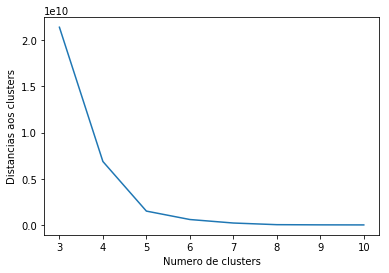

In [14]:
plt.plot(range(init_clusters, end_clusters), scores)
plt.xlabel('Numero de clusters')
plt.ylabel('Distancias aos clusters')

In [15]:
k_means = KMeans(n_clusters=3, n_jobs=-1, max_iter=2000)
k_means.fit(df_kmeans_1)

prediction = pd.Series(k_means.predict(df_kmeans_1), index=df_kmeans_1.index)
print prediction

grupo
Adrenal carcinoma                   0
chondrosarcoma                      0
cystic nephroma                     0
Extraesqueletal Ewing Sarcoma       0
Neuroblastic tumor                  0
germ cell tumor                     0
vascular tumor                      1
mesoblastic nephroma                0
sopharyngeal carcinoma              0
normal kidney                       0
rhabdomyosarcoma                    0
undiferenciated malignt neoplasm    2
wilms tumor                         0
osteosarcoma                        0
renal carcinoma                     0
dtype: int32


In [16]:
k_means = KMeans(n_clusters=4, n_jobs=-1, max_iter=2000)
k_means.fit(df_kmeans_1)

prediction = pd.Series(k_means.predict(df_kmeans_1), index=df_kmeans_1.index)
print prediction

grupo
Adrenal carcinoma                   0
chondrosarcoma                      0
cystic nephroma                     0
Extraesqueletal Ewing Sarcoma       3
Neuroblastic tumor                  3
germ cell tumor                     0
vascular tumor                      1
mesoblastic nephroma                0
sopharyngeal carcinoma              0
normal kidney                       0
rhabdomyosarcoma                    3
undiferenciated malignt neoplasm    2
wilms tumor                         3
osteosarcoma                        0
renal carcinoma                     0
dtype: int32


In [17]:
k_means = KMeans(n_clusters=5, n_jobs=-1, max_iter=2000)
k_means.fit(df_kmeans_1)

prediction = pd.Series(k_means.predict(df_kmeans_1), index=df_kmeans_1.index)
print prediction

grupo
Adrenal carcinoma                   3
chondrosarcoma                      3
cystic nephroma                     3
Extraesqueletal Ewing Sarcoma       4
Neuroblastic tumor                  4
germ cell tumor                     3
vascular tumor                      1
mesoblastic nephroma                3
sopharyngeal carcinoma              3
normal kidney                       0
rhabdomyosarcoma                    4
undiferenciated malignt neoplasm    2
wilms tumor                         4
osteosarcoma                        3
renal carcinoma                     3
dtype: int32


In [18]:
k_means = KMeans(n_clusters=6, n_jobs=-1, max_iter=2000)
k_means.fit(df_kmeans_1)

prediction = pd.Series(k_means.predict(df_kmeans_1), index=df_kmeans_1.index)
print prediction

grupo
Adrenal carcinoma                   3
chondrosarcoma                      3
cystic nephroma                     3
Extraesqueletal Ewing Sarcoma       4
Neuroblastic tumor                  0
germ cell tumor                     0
vascular tumor                      1
mesoblastic nephroma                3
sopharyngeal carcinoma              3
normal kidney                       5
rhabdomyosarcoma                    4
undiferenciated malignt neoplasm    2
wilms tumor                         4
osteosarcoma                        3
renal carcinoma                     3
dtype: int32


In [19]:
k_means = KMeans(n_clusters=7, n_jobs=-1, max_iter=2000)
k_means.fit(df_kmeans_1)

prediction = pd.Series(k_means.predict(df_kmeans_1), index=df_kmeans_1.index)
print prediction

grupo
Adrenal carcinoma                   4
chondrosarcoma                      4
cystic nephroma                     4
Extraesqueletal Ewing Sarcoma       6
Neuroblastic tumor                  6
germ cell tumor                     0
vascular tumor                      1
mesoblastic nephroma                4
sopharyngeal carcinoma              4
normal kidney                       3
rhabdomyosarcoma                    5
undiferenciated malignt neoplasm    2
wilms tumor                         6
osteosarcoma                        4
renal carcinoma                     4
dtype: int32
